<a href="https://colab.research.google.com/github/nickteim/Reinforcement_Learning-/blob/main/VideoTransform_MiDaS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [1]:
import os
import glob
import time
from PIL import Image
import numpy as np
import PIL
import random
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [2]:
import os
import glob
import time
from PIL import Image
import numpy as np
import PIL
import random
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
import torch.nn.utils as utils
import torchvision.utils as vutils    
import torchvision.models as models
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt
from PIL import Image
from skimage import io


# Download video from YouTube

In [3]:
# !pip install pytube3

In [4]:
!pip install git+https://github.com/nficano/pytube

  Cloning https://github.com/nficano/pytube to /tmp/pip-req-build-5cazikoh
  Running command git clone -q https://github.com/nficano/pytube /tmp/pip-req-build-5cazikoh
  Created wheel for pytube: filename=pytube-9.7.1-cp36-none-any.whl size=40437 sha256=7816bf17c5622a4dbc40e26bf76b19abbf4fb42b1043b434d97fbffcd66a0af9
  Stored in directory: /tmp/pip-ephem-wheel-cache-nyxwhmzo/wheels/44/da/40/3b5e03abe33a91895343814fb44b309512375408f4a909555b
Successfully built pytube


In [7]:
from pytube import YouTube
from moviepy.editor import *
 
# download a file from youtube
youtube_link = 'https://www.youtube.com/watch?v=92U11ya1xuQ'
w = YouTube(youtube_link).streams.first()
w.download(output_path="/content/")

'/content/28 WAYS TO PEEL AND CUT FRUITS LIKE A PRO.mp4'

In [8]:
Location_video='/content/28 WAYS TO PEEL AND CUT FRUITS LIKE A PRO.mp4'

##Proces video

###Split video to images

In [ ]:
## I just did about 6000 images
os.mkdir('/content/test_vid/')
os.mkdir('/content/test_vid/Frames/')
# converting video into frames
vidcap = cv2.VideoCapture(Location_video)
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("/content/test_vid/Frames/%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame:%d, ',count, success)
  count += 1

In [10]:
##zero padding every image name in folder to get the right order
import shutil
import os

sourcedir = "/content/test_vid/Frames"; extensions = (".jpg", ".jpeg")
files = [(f, f[f.rfind("."):], f[:f.rfind(".")]) for f in os.listdir(sourcedir)if f.endswith(extensions)]
maxlen = len(max([f[2] for f in files], key = len))

for item in files:
    zeros = maxlen-len(item[2])
    shutil.move(sourcedir+"/"+item[0], sourcedir+"/"+str(zeros*"0")+item[0])

###Get model from github

 github model --> https://pytorch.org/hub/intelisl_midas_v2/

In [11]:
os.mkdir('/content/test_vid/new_model')

In [ ]:
#Used GPU
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS")

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

In [13]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.default_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


### Proces images

In [14]:
import time

/content/test_vid/Frames/1500.jpg
[]
/content/test_vid/Frames/1510.jpg
[0.3681190000000001]
/content/test_vid/Frames/1520.jpg
[0.6636980000000037]
/content/test_vid/Frames/1530.jpg
[0.9669999999999987]
/content/test_vid/Frames/1540.jpg
[1.2311680000000038]
/content/test_vid/Frames/1550.jpg
[1.5013900000000007]
/content/test_vid/Frames/1560.jpg
[1.7711359999999985]
/content/test_vid/Frames/1570.jpg
[2.0599419999999924]
/content/test_vid/Frames/1580.jpg
[2.3505049999999983]
/content/test_vid/Frames/1590.jpg
[2.6103230000000224]
/content/test_vid/Frames/1600.jpg
[2.876733999999999]


KeyboardInterrupt: ignored

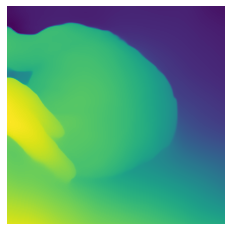

In [17]:
number=0 # each image will be named with numbers
time_array = []



path1_depth = '/content/test_vid/Frames'
data_depth = os.listdir(path1_depth)
ordedered_list = sorted(data_depth)
ordedered_list = ordedered_list[1500:]


## put image through model
for e in ordedered_list:
  start_time = time.clock()
  input = '/content/test_vid/Frames/' + e
  if number % 10 == 0:
    print(input)
    print(time_array[-1:])

  img_ori = io.imread(input)
  # # print(input)(imgUMat),
  img = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)

  input_batch = transform(img).to(device)


  with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
  
  # saves the mathplot image
  output = prediction.cpu().numpy()
  plt.imshow(output)
  plt.axis('off')

  out = "/content/test_vid/new_model/%d.jpg" % number
  plt.savefig(out, bbox_inches='tight')
    

  # time_array = time.time() - start_time
  set_time_array = time.clock() - start_time
  time_array.append(set_time_array)
  
  number += 1



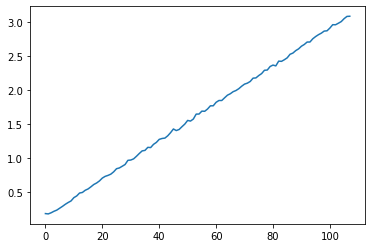

In [19]:
import matplotlib.pyplot as plt

x = [i for i in range(108)]
y = time_array
# print(y)

# plot
plt.plot(x,y)
# beautify the x-labels
# plt.gcf().autofmt_xdate()

plt.show()
